In [15]:
import numpy as np
import scipy as sp
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
wave_data, sr = librosa.load('./sounds/sample.wav')

In [3]:
len(wave_data)

87520

In [4]:
# length = len(wave_data)
segment_length = 1024
n_overlap = segment_length // 2
win = np.hamming(segment_length)

In [5]:
step = segment_length - n_overlap
step

512

In [6]:
shape = wave_data.shape[:-1]+((wave_data.shape[-1]-n_overlap)//step, segment_length)
shape

(169, 1024)

In [7]:
strides = wave_data.strides[:-1]+(step*wave_data.strides[-1], wave_data.strides[-1])
strides

(2048, 4)

In [8]:
result = np.lib.stride_tricks.as_strided(wave_data, shape=shape, strides=strides)
result.shape

(169, 1024)

In [9]:
spec = win * result

In [10]:
spec = sp.fft.fft(result, n=1024)

In [26]:
# db = librosa.amplitude_to_db(np.abs(spec))
db = np.log10(np.abs(spec)) * 10

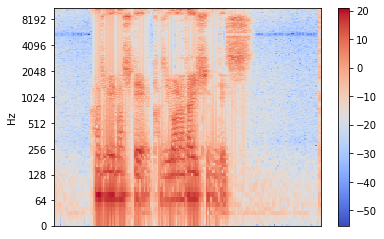

In [27]:
librosa.display.specshow(db.T, y_axis='log')
plt.colorbar()

In [18]:
lib_db = librosa.amplitude_to_db(np.abs(spec))

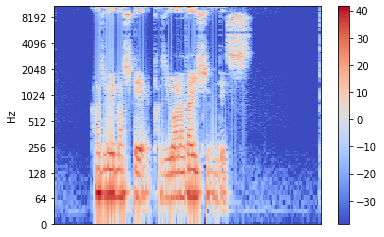

In [19]:
librosa.display.specshow(lib_db.T, y_axis='log')
plt.colorbar()